In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
data_bm = []
data_ppo = []
data_ppo_refacto = []
data_ppo_rfe = []
data_ppo_cvrfe = []

times = []

for i in range(0, 10):
    
    df = pd.read_csv(f"data/20241122_PPOUniswap/test_history_{i}.csv")
    data_ppo.append(df)

    df = pd.read_csv(f"data/20241122_PPOUniswap_Benchmark/test_history_bm_{i}.csv")
    data_bm.append(df)

    times_df = pd.read_csv(f'data/20241122_PPOUniswap_Benchmark/timeline_{i}.csv')
    times.append(times_df)
        
    df = pd.read_csv(f"data/20250723_PPOUniswap_RFE/test_history_{i}.csv")
    data_ppo_rfe.append(df)

    df = pd.read_csv(f"data/20250726_PPOUniswap_CVRFE/test_history_{i}.csv")
    data_ppo_cvrfe.append(df)

    
data_ppo = pd.concat(data_ppo, ignore_index=True)
# data_ppo_refacto = pd.concat(data_ppo_refacto, ignore_index=True)
data_bm = pd.concat(data_bm, ignore_index=True)
data_ppo_rfe = pd.concat(data_ppo_rfe, ignore_index=True)
data_ppo_cvrfe = pd.concat(data_ppo_cvrfe, ignore_index=True)
times = pd.concat(times, ignore_index=True)



In [3]:
ppo_cum_ret = data_ppo.Reward.cumsum()
# ppo_refacto_cum_ret = data_ppo_refacto.Reward.cumsum()
bm_cum_ret = data_bm.Reward.cumsum()
ppo_rfe_cum_ret = data_ppo_rfe.Reward.cumsum()
ppo_cvrfe_cum_ret = data_ppo_cvrfe.Reward.cumsum()

In [4]:
times['timestamp'] = pd.to_datetime(times['timestamp'])

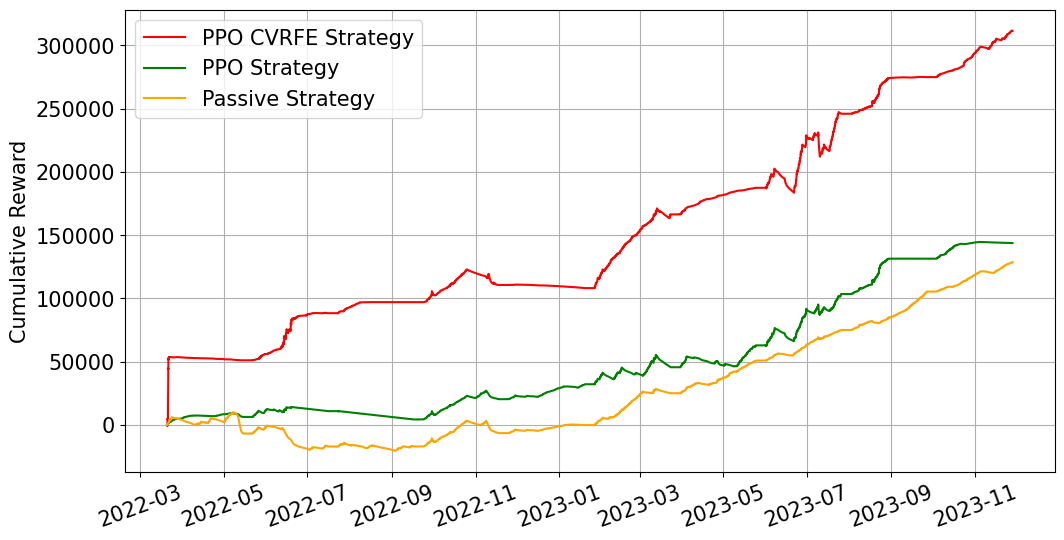

In [15]:
ft_size = 15
plt.figure(figsize=(12, 6))
plt.plot(times['timestamp'], ppo_cvrfe_cum_ret, label='PPO CVRFE Strategy', color='red')
# plt.plot(times['timestamp'], ppo_rfe_cum_ret, label='PPO RFE Cumulative Return', color='blue')
plt.plot(times['timestamp'], ppo_cum_ret, label='PPO Strategy', color='green')
plt.plot(times['timestamp'], bm_cum_ret, label='Passive Strategy', color='orange')
# plt.xlabel('Time', fontsize=ft_size)
plt.ylabel('Cumulative Reward', fontsize=ft_size)
plt.xticks(fontsize=ft_size, rotation=20)
plt.yticks(fontsize=ft_size)
# plt.title('Cumulative Reward Comparison')
plt.legend(fontsize=ft_size)
plt.grid()
plt.savefig('CVRFE_results.png')
plt.show()

In [20]:
for i in range(1,9):
    print(ppo_cum_ret[1500*i])

23488.711795619718
22727.579652708828
45870.752389266054
42573.03749529168
63198.71360573788
70717.94313774927
116201.01584431538
135293.5771571814


In [1]:
from custom_env_folder.custom_env2 import Uniswapv3Env
# from custom_env_folder.custom_env import Uniswapv3Env as Uniswapv3EnvOld

In [2]:
import pandas as pd

# import market data
uni_table = pd.read_csv('data_price_uni_h_time.csv')

uni_time = uni_table[['timestamp']]
uni_data = uni_table[['price']]

split_size = 1500
dfs_list = [uni_table.iloc[i:i + split_size].reset_index(drop=True) for i in range(0, len(uni_table), split_size)]
dfs_list_prices = [uni_data.iloc[i:i + split_size].reset_index(drop=True) for i in range(0, len(uni_data), split_size)]


dfs_list.pop()      # drop the last df which has different length
dfs_list_prices.pop()  # drop the last df which has different length

,price
0,2028.7076
1,2040.3520
2,2029.1648
3,2039.3059
4,2063.6064
...,...
1490,2248.6172
1491,2275.1184
1492,2302.4653
1493,2310.9368


In [3]:
uni_train = pd.concat(dfs_list[:5], ignore_index=True)

uni_test = dfs_list[5]
uni_test_prices = dfs_list_prices[5]

In [4]:
train_env = Uniswapv3Env(delta=0.05, 
                action_values=[0, 20, 50], 
                market_data=uni_train, 
                market_features=None,
                x=10, 
                gas=5)

test_env = Uniswapv3Env(delta=0.05, 
                action_values=[0, 20, 50], 
                market_data=uni_test, 
                market_features=None,
                x=10, 
                gas=5)

/Users/benoitrobaglia/Documents/Task_3_FinRL_DeFi/src/custom_env_folder/custom_env2.py:446: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['chop_14'].fillna(method='ffill', inplace=True)
/Users/benoitrobaglia/Documents/Task_3_FinRL_DeFi/src/custom_env_folder/custom_env2.py:446: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['chop_14'].fillna(method='ffill', inplace=True)
/Users/benoitrobaglia/Documents/Task_3_FinRL_DeFi/src/custom_

In [5]:
uni_train_process = train_env.market_data.copy()

<Axes: >

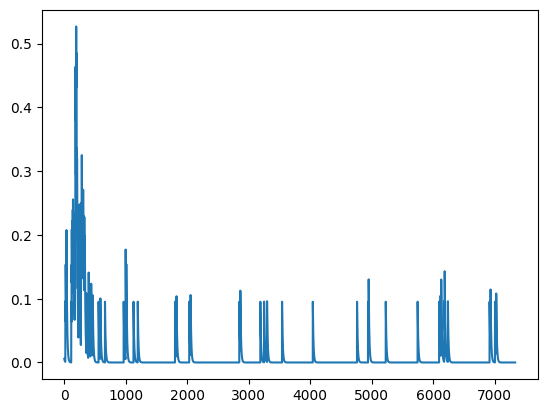

In [6]:
uni_train_process['cp_prob'].plot()

<Axes: >

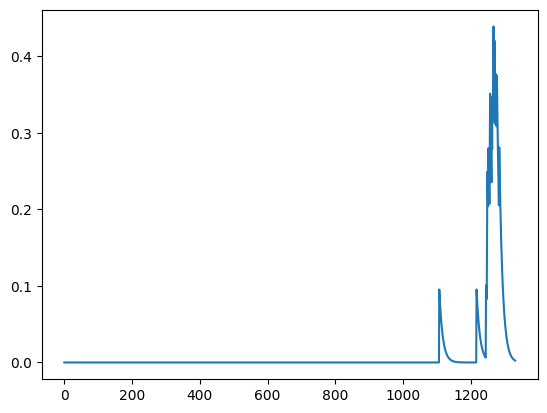

In [7]:
test_env.market_data['cp_prob'].plot()

In [6]:
features = list(uni_train_process.columns)
to_remove = ['timestamp', 'price', 'open_price', 'high_price', 'low_price', 'closed_price', 'log_returns']
for col in to_remove:
    if col in features:
        features.remove(col)

uni_train_process['regime_switch'] = uni_train_process['adxr'] > 14
features.append('regime_switch')


In [7]:
horizon = 5
uni_train_process['future_high'] = uni_train_process['price'].rolling(horizon).max().shift(-horizon)
uni_train_process['future_low'] = uni_train_process['price'].rolling(horizon).min().shift(-horizon)
uni_train_process['future_range'] = uni_train_process['future_high'] - uni_train_process['future_low']
uni_train_process['future_range_cat'] = pd.qcut(uni_train_process['future_range'], q=3, labels = False)
uni_train_process = uni_train_process.dropna()


In [8]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE

In [9]:
target_column = 'future_range_cat'

df_clean = uni_train_process.dropna(subset=features + [target_column])
X = df_clean[features]
y = df_clean[target_column]
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1, class_weight='balanced')

# CV-RFE setup: uses cross-validation to select optimal number of features
cvrfe = RFE(estimator=rf, step=1, n_features_to_select=7)
cvrfe.fit(X, y)

# Get selected features
selected_features = [f for f, s in zip(features, cvrfe.support_) if s]
print(f"Selected {len(selected_features)} features for {target_column}: {selected_features}")



Selected 7 features for future_range_cat: ['ew_sigma', 'ma168', 'sma_50', 'sma_100', 'atr_14', 'atr_21', 'macd']


In [10]:
import numpy as np
# Feature importance from CV-RFE
importances_full = np.full(len(features), np.nan)
importances_full[cvrfe.support_] = cvrfe.estimator_.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': features,
    'selected': cvrfe.support_,
    'ranking': cvrfe.ranking_,
    'importance': importances_full
})


In [11]:
y_pred = cvrfe.predict(X)

In [12]:
(y_pred == y).mean()

np.float64(0.7372730994950184)

In [20]:

uni_test_process = test_env.market_data.copy()

uni_test_process['future_high'] = uni_test_process['price'].rolling(horizon).max().shift(-horizon)
uni_test_process['future_low'] = uni_test_process['price'].rolling(horizon).min().shift(-horizon)
uni_test_process['future_range'] = uni_test_process['future_high'] - uni_test_process['future_low']
uni_test_process['future_range_cat'] = pd.qcut(uni_train_process['future_range'], q=3, labels = False)
uni_test_process = uni_test_process.dropna()
uni_test_process['regime_switch'] = uni_test_process['adxr'] > 14

In [21]:
y_pred_test = cvrfe.predict(uni_test_process[features])

In [22]:
(y_pred_test == uni_test_process[target_column]).mean()

np.float64(0.2155237377543331)

In [ ]:
# test_env_old = Uniswapv3EnvOld(delta=0.05, 
#                 action_values=[0, 20, 50],
#                 market_data=uni_test_prices, 
#                 x=10, 
#                 gas=5)

In [6]:
test_env.reset()

(array([ 2.88198300e+03,  7.96660000e+04,  2.00000000e+01,  5.40421842e+04,
         1.00000000e+00,  2.93366180e+03,  2.73848850e+03,  2.93791015e+03,
         2.90465142e+03,  2.87139270e+03,  4.73325711e+01, -8.88123580e-01,
         7.15003685e+01]),
 {})

In [7]:
test_env_old.reset()

(array([ 2.88198300e+03,  7.96660000e+04,  2.00000000e+01,  5.40421842e+04,
         1.00000000e+00,  2.93366180e+03,  2.73848850e+03,  2.93791015e+03,
         2.90465142e+03,  2.87139270e+03,  4.73325711e+01, -8.88123580e-01,
         7.15003685e+01]),
 {})

In [8]:
test_env.step(1)

(array([ 2.87242900e+03,  7.96330000e+04,  2.00000000e+01,  6.29124162e+04,
         4.84795757e-03,  2.93059147e+03,  2.74030840e+03,  2.93226197e+03,
         2.89567875e+03,  2.85909553e+03,  4.93806994e+01, -9.90760883e-01,
         7.60063675e+01]),
 np.float64(-24.81155867686746),
 False,
 np.False_,
 {})

In [9]:
test_env_old.step(1)

(array([ 2.87242900e+03,  7.96330000e+04,  2.00000000e+01,  6.29124162e+04,
         4.84795757e-03,  2.93059147e+03,  2.74030840e+03,  2.93226197e+03,
         2.89567875e+03,  2.85909553e+03,  4.93806994e+01, -9.90760883e-01,
         7.60063675e+01]),
 np.float64(-24.81155867686746),
 False,
 np.False_,
 {})

In [23]:
test_env.market_data.ew_sigma.values

array([0.00493641, 0.00484796, 0.00484559, ..., 0.01435849, 0.01456688,
       0.01425823], shape=(1332,))

In [7]:
test_env_old.ew_sigma

NameError: name 'test_env_old' is not defined

In [25]:
test_env_old.market_data

array([2881.983 , 2872.429 , 2856.316 , ..., 2023.693 , 2061.185 ,
       2050.9856], shape=(1332,))

In [28]:
test_env.market_data.price.values

array([2881.983 , 2872.429 , 2856.316 , ..., 2023.693 , 2061.185 ,
       2050.9856], shape=(1332,))

In [ ]:
24494/1.28

19135.9375

In [ ]:
145000/12

12083.333333333334

In [22]:
(3720/3559-1)*12

0.5428491149199219

In [5]:
df = test_env.market_data.copy()

In [6]:
df

,timestamp,price,open_price,high_price,low_price,closed_price,log_returns,ew_sigma,ma24,ma168,...,price_momentum_10,price_momentum_24,daily_range,gap,ht_trendline,ht_trendmode,ht_dcperiod,ht_dcphase,ht_inphase,ht_quadrature
0,2022-03-20 13:00:00,2881.9830,2930.0010,2936.0498,2881.9830,2881.9830,-0.001282,0.004936,2933.661796,2738.488500,...,-0.018218,-0.030444,0.018453,0.015359,2930.260587,1,19.217207,0.951875,-8.064595,-3.476554
1,2022-03-20 14:00:00,2872.4290,2935.4620,2936.0498,2872.4290,2872.4290,-0.003321,0.004848,2930.591475,2740.308403,...,-0.016585,-0.025012,0.021673,0.018556,2927.208960,1,19.822455,-4.912528,-6.206699,-4.049171
2,2022-03-20 15:00:00,2856.3160,2920.8706,2936.0498,2856.3160,2856.3160,-0.005625,0.004846,2925.974646,2741.985090,...,-0.021884,-0.037344,0.027298,0.016864,2924.095423,1,20.761351,-10.345961,-7.130177,-14.321745
3,2022-03-20 16:00:00,2847.7210,2920.2227,2936.0498,2847.7210,2847.7210,-0.003014,0.004744,2921.203325,2743.623348,...,-0.030084,-0.038657,0.030247,0.022374,2920.872556,1,22.138442,-14.464635,-11.931840,-34.848129
4,2022-03-20 17:00:00,2847.2830,2936.0498,2936.0498,2847.2830,2847.2830,-0.000154,0.004628,2916.197854,2745.258998,...,-0.024459,-0.040483,0.030233,0.031017,2918.380873,1,23.883926,-15.375378,-28.611048,-46.583182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2022-05-14 20:00:00,1998.3510,2028.5786,2028.5786,1952.5907,1998.3510,-0.005640,0.014645,2015.393354,2240.389256,...,-0.007940,-0.032090,0.037459,0.009417,2020.400113,1,25.957684,4.018231,-38.318538,74.863187
1328,2022-05-14 21:00:00,1993.1318,2014.3444,2015.6034,1952.5907,1993.1318,-0.002615,0.014281,2013.442058,2236.373968,...,-0.006818,-0.022957,0.031282,0.008003,2017.943456,1,25.493486,10.558216,-17.409372,104.503180
1329,2022-05-14 22:00:00,2023.6930,2006.8147,2023.6930,1952.5907,2023.6930,0.015217,0.014358,2011.303383,2232.747165,...,0.018435,-0.024736,0.035430,0.006865,2015.842698,1,24.647753,19.213939,18.435731,123.885797
1330,2022-05-14 23:00:00,2061.1850,1987.0624,2061.1850,1952.5907,2061.1850,0.018357,0.014567,2011.608150,2229.587289,...,0.042230,0.003561,0.054651,-0.018101,2013.618331,0,24.027111,31.080703,60.262125,48.048831


In [11]:
features = ['ew_sigma_01', 'dema_10', 'ma168', 'tema_10', 'dema_5', 'atr_7', 'tema_5', 'ew_sigma', 'sma_100', 'tema_20', 'atr_14', 'atr_21', 'sma_50', 'roc_25', 'price_momentum_1', 'stddev_20', 'ema_5']

In [12]:
features.remove('ew_sigma')

In [13]:
test_env = Uniswapv3Env(delta=0.05, 
                action_values=[0, 20, 50], 
                market_data=uni_test, 
                market_features=features,
                x=10, 
                gas=5)

In [14]:
test_env.reset()

(array([ 2.88198300e+03,  7.96660000e+04,  2.00000000e+01,  5.40421842e+04,
         1.00000000e+00,  4.26887167e-03,  2.89421221e+03,  2.73848850e+03,
         2.88760062e+03,  2.88599695e+03,  4.36050051e+01,  2.88198436e+03,
         2.84920329e+03,  2.89281286e+03,  4.70489468e+01,  5.20597582e+01,
         2.92978021e+03, -2.47091496e+00, -1.28129227e-03,  1.98812475e+01,
         2.89855596e+03]),
 {})

In [14]:
features[17]

'ema_5'

In [19]:
test_env.market_data[features].isna().sum()

ew_sigma_01           0
dema_10               0
ma168                 0
tema_10               0
dema_5                0
atr_7                 0
tema_5                0
sma_100               0
bb_middle_50        126
tema_20               0
atr_14                0
atr_21                0
bb_upper_50         126
sma_50                0
roc_25                0
price_momentum_1      0
stddev_20             0
ema_5                 0
dtype: int64

In [17]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set parameters
expname = "20250726_PPOUniswap_CVRFE"
data_dir = f"data/{expname}"
num_windows = 10 
targets = ['vol']

# Function to load data for a given target
def load_feature_data(target, num_windows, data_dir):
    all_data = []
    for i in range(num_windows):
        file_path = os.path.join(data_dir, f"{target}_feature_importance_{i}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['window'] = i  # Add window identifier
            all_data.append(df)
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        raise ValueError(f"No files found for target: {target}")

# Load data for price and volatility
vol_data = load_feature_data('vol', num_windows, data_dir)

# Preview loaded data
print("Volatility Data Sample:\n", vol_data.head())


Volatility Data Sample:
     feature  selected  ranking  importance  window
0  ew_sigma      True        1    0.942632       0
1      ma24     False       40         NaN       0
2     ma168     False       10         NaN       0
3    sma_20     False       44         NaN       0
4    sma_50     False        6         NaN       0


In [23]:
def filter_cv_rfe_features(data, cv_rfe_selection):
    # data: your feature importance DataFrame (columns: 'feature', 'window', 'importance')
    # cv_rfe_selection: dict, e.g. {0: ['feat_a', 'feat_b'], 1: ['feat_a', 'feat_c'], ...}
    filtered = []
    for window, features in cv_rfe_selection.items():
        sub = data[(data['window'] == window) & (data['feature'].isin(features))]
        filtered.append(sub)
    return pd.concat(filtered) if filtered else pd.DataFrame(columns=data.columns)

def plot_cv_rfe_feature_importance_heatmap(data, cv_rfe_selection, target, save_dir="plots"):
    filtered_data = filter_cv_rfe_features(data, cv_rfe_selection)
    pivot = filtered_data.pivot(index='feature', columns='window', values='importance')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f"CVRFE Selected Feature Importance Heatmap for {target.capitalize()}")
    plt.xlabel("Rolling Window")
    plt.ylabel("Feature")
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # plt.savefig(os.path.join(save_dir, f"{target}_cvrfe_importance_heatmap.png"))
    plt.show()
    plt.close()


In [ ]:
plot_cv_rfe_feature_importance_heatmap(vol_data, )

In [45]:
cv_rfe_selection = vol_data.loc[vol_data.selected == True].query('importance > 0.001').groupby('window').feature.apply(list).to_dict()

In [46]:
cv_rfe_selection

{0: ['ew_sigma', 'atr_14', 'atr_21'],
 1: ['ew_sigma', 'cmo_20', 'minus_di'],
 2: ['ew_sigma'],
 3: ['ew_sigma', 'bb_middle', 'price_momentum_5'],
 4: ['ew_sigma', 'rsi_7', 'stddev_20'],
 5: ['ew_sigma', 'rsi_7', 'atr_14', 'chop_14'],
 6: ['ew_sigma', 'bb_lower', 'bb_width_20', 'price_momentum_5', 'chop_14'],
 7: ['ew_sigma', 'ma168', 'chop_14'],
 8: ['ew_sigma', 'minus_di', 'price_ema12_ratio', 'cp_prob'],
 9: ['ew_sigma', 'ema_5', 'dx']}

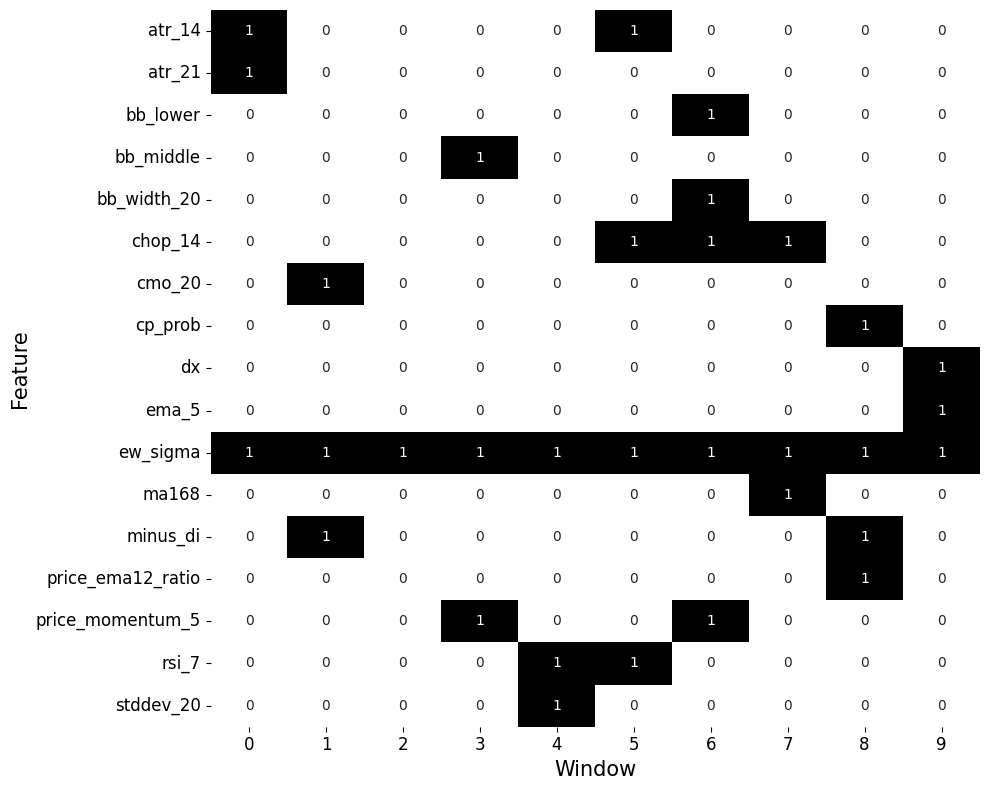

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


features = sorted({f for v in cv_rfe_selection.values() for f in v})
windows = sorted(cv_rfe_selection.keys())
# Build a DataFrame: rows=features, columns=windows, fill with 0s
matrix = pd.DataFrame(0, index=features, columns=windows)
for w, feats in cv_rfe_selection.items():
    for f in feats:
        matrix.at[f, w] = 1

plt.figure(figsize=(10, len(features)//2))
sns.heatmap(matrix, cmap='Greys', cbar=False, annot=True, fmt='d')
plt.xlabel("Window", fontsize=ft_size)
plt.ylabel("Feature", fontsize=ft_size)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('CVRFE_feature_selection_matrix.png', bbox_inches='tight')
# plt.title("CVRFE Feature Selection Matrix")
plt.tight_layout()
plt.show()


In [10]:
i=1
aa = pd.read_csv(f'data/20250723_PPOUniswap_RFE/test_history_{i}.csv')
bb = pd.read_csv(f'data/20241122_PPOUniswap/test_history_{i}.csv')

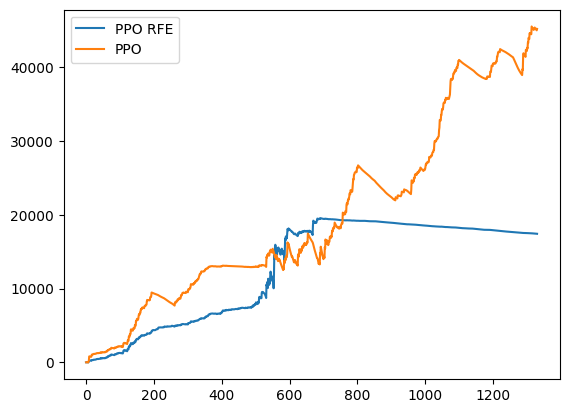

In [11]:
plt.figure()
aa['Reward'].cumsum().plot(label='PPO RFE')
bb['Reward'].cumsum().plot(label='PPO')
plt.legend()
plt.show()

<Axes: >

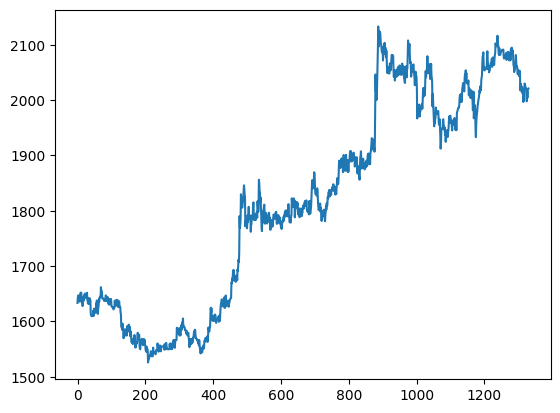

In [64]:
aa['Price'].plot()

<Axes: >

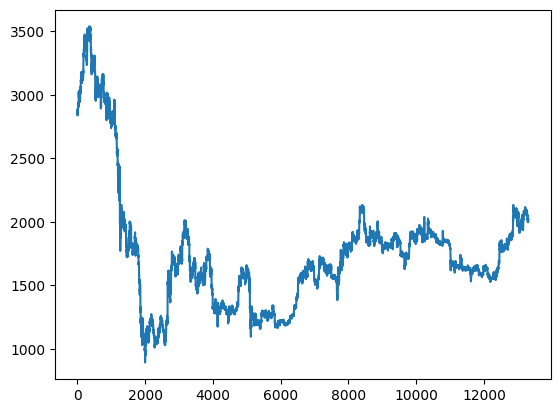

In [67]:
data_ppo.Price.plot()